# CBSD68 Denoising Dataset

In [13]:
import os

current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /home/mkang2/Convolutional-Nearest-Neighbor/Testing


In [14]:
# Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 
from torchsummary import summary
from torchvision.transforms import v2
import numpy as np


# Train + Data 
import sys 
sys.path.append('../Layers')
from Conv1d_NN import *
from Conv2d_NN import *
from Conv1d_NN_spatial import * 

from Conv2d_NN_spatial import * 
from ConvNN_CNN_Branching import *

sys.path.append('../Data')
from CBSD68 import NoisyCBSD68_dataset, test_denoise_visual_CBSD


sys.path.append('../Models')
from denoising_models import DenoisingCNN, DenoisingBranching_ConvNN_2D_Spatial_K_N, DenoisingBranching_ConvNN_2D_K_N, DenoisingConvNN_2D_K_N

sys.path.append('../Train')
from train2d import train_denoising_model, evaluate_denoising_accuracy, evaluate_accuracy_psnr


import numpy as np



In [15]:
noisycbsd68 = NoisyCBSD68_dataset(batch_size=32, noise_std=0.3, train_count=200, test_count=40, target_size=256)

In [16]:
print(len(noisycbsd68.train_data))
print(len(noisycbsd68.test_data))
print(len(noisycbsd68.test_data[0]))
print(noisycbsd68.train_data[0][0].shape)


200
40
3
torch.Size([3, 256, 256])


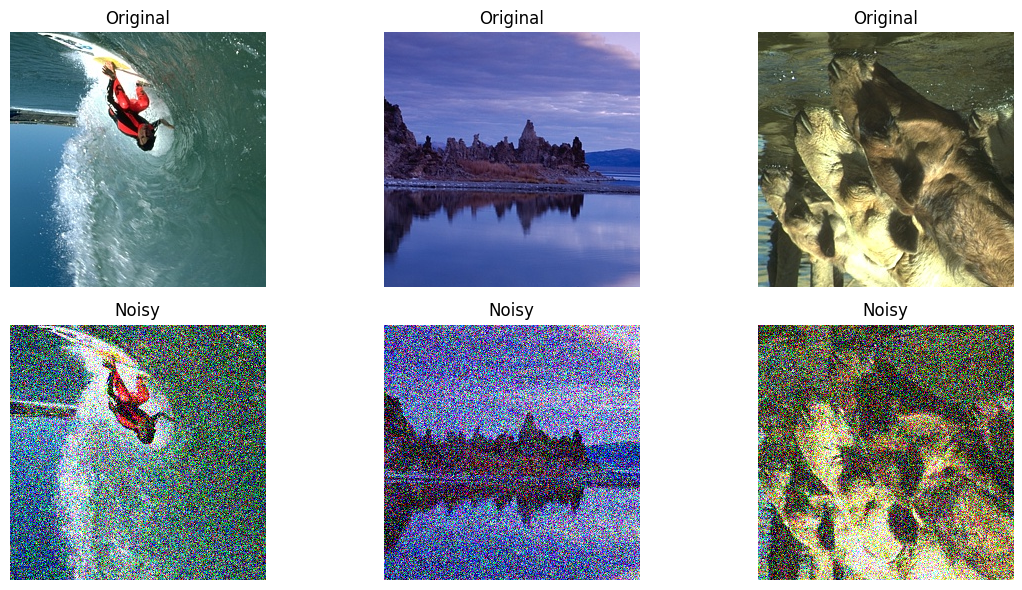

In [17]:
noisycbsd68.visual(3)

### Control CNN Model



In [18]:
# CNN control model 
CNN = DenoisingCNN(in_ch=3, out_ch=3, kernel_size=3, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(CNN, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(CNN, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(CNN, noisycbsd68.test_loader, criterion, device='cuda')


# Print out output of trained model
test_denoise_visual_CBSD(CNN, noisycbsd68.test_data, device='cuda')


RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


## Branching Model

In [19]:
# Denoising Branching CNN + ConvNN Spatial, K = 9, N = 6 (36), 16:16
denoisingbranching_convNN_spatial_K_N_16_16 = DenoisingBranching_ConvNN_2D_Spatial_K_N(in_ch=3, out_ch=3, K=9, N=6, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.test_data, device='cuda')


RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [20]:
# Denoising Branching CNN + ConvNN Spatial, K = 9, N = 36, 16:16
denoisingbranching_convNN_K_N_16_16 = DenoisingBranching_ConvNN_2D_K_N(in_ch=3, out_ch=3, K=9, N=36, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_K_N_16_16, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoisingbranching_convNN_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoisingbranching_convNN_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoisingbranching_convNN_K_N_16_16, noisycbsd68.test_data, device='cuda')



RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Epoch 1, Time: 0.828096866607666, Loss: 0.1307916481580053
Epoch 2, Time: 0.819826602935791, Loss: 0.06117392491017069
Epoch 3, Time: 0.8170325756072998, Loss: 0.05326959224683898
Epoch 4, Time: 0.8217036724090576, Loss: 0.04420900025538036
Epoch 5, Time: 0.8384959697723389, Loss: 0.03977604370032038
Epoch 6, Time: 0.8394057750701904, Loss: 0.034259017024721415
Epoch 7, Time: 0.8283817768096924, Loss: 0.029622383947883333
Epoch 8, Time: 0.8237416744232178, Loss: 0.025587879919580052
Epoch 9, Time: 0.8133397102355957, Loss: 0.022665676793881824
Epoch 10, Time: 0.82686448097229, Loss: 0.020929535318698202

 Average epoch time: 0.8256889104843139
Average loss on test set: 0.019418401643633842
Average PSNR on test set: 17.03936767578125


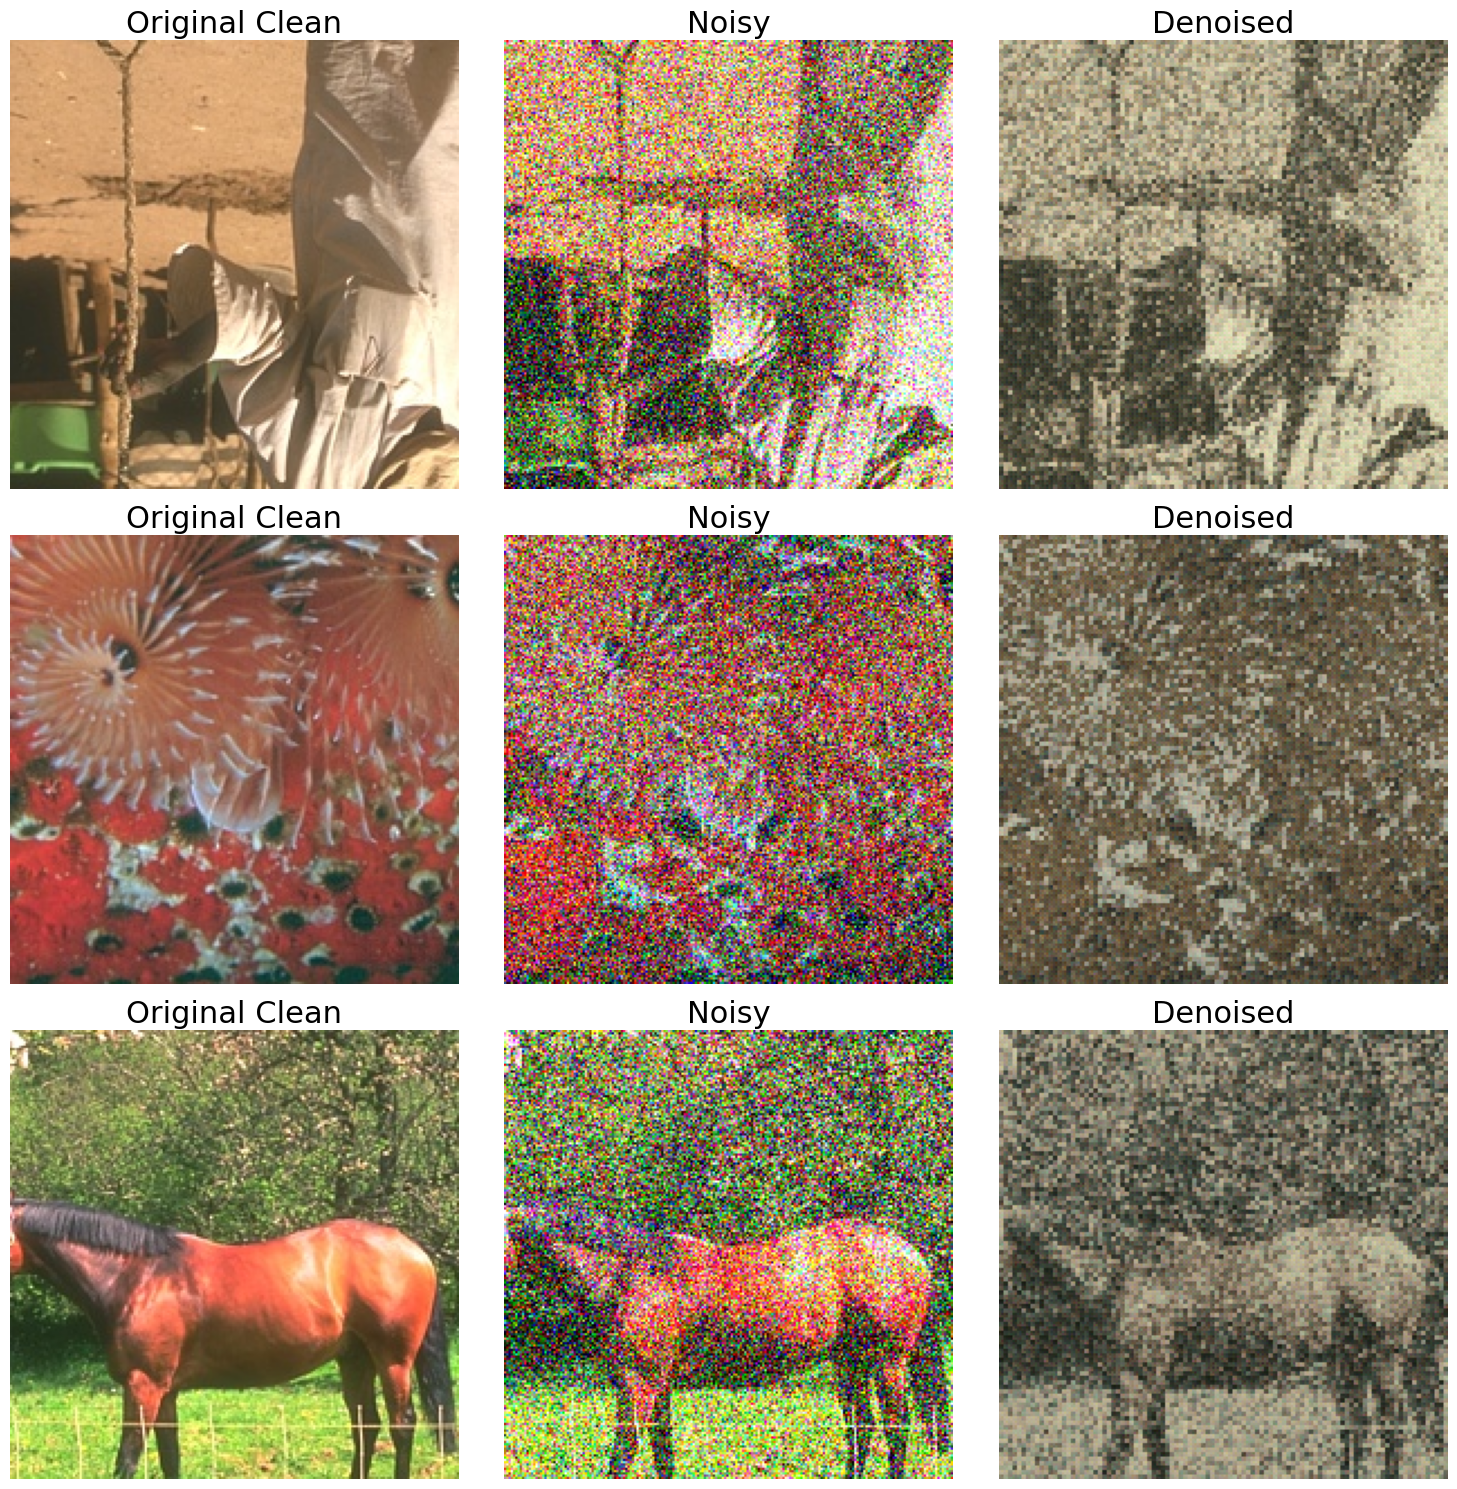

In [ ]:
# ConvNN K = 9, N = 36
denoising_convNN_2D_K_N = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=9, N=36, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_K_N.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoising_convNN_2D_K_N, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_K_N, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_K_N, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_K_N, noisycbsd68.test_data, device='cuda')

